In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import get_vectors

In [ ]:
data = pd.read_csv('capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

data.head(5)

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [ ]:
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb"))
len(word_embeddings)

243

In [ ]:
def cosine_similarity(A, B):

  # cos  = (A @ B) / ( norm(A) * norm(B))
  # norm(A) = sqrt(A**2)

  dot_product = np.dot(A,B)

  norm_A = np.sqrt(np.dot(A,A))
  norm_B = np.sqrt(np.dot(B,B))

  cos = dot_product / (norm_A * norm_B)

  return cos

In [ ]:
king = word_embeddings["king"]
queen = word_embeddings["queen"]

cosine_similarity(king,queen)

0.6510956

In [ ]:
def Euclidean(A,B):

  diff = A - B
  euc = np.linalg.norm(diff)

  return euc

In [ ]:
Euclidean(king,queen)

2.4796925

In [ ]:
def get_country(city1,country1,city2,embeddings):

  group = set((city1, country1, city2))

  # get vectors
  city1_embed = embeddings[city1]
  country1_embed = embeddings[country1]
  city2_embed = embeddings[city2]

  # compute the new vector
  country2_embed = country1_embed - city1_embed + city2_embed

  similarity = -1

  for key,val in embeddings.items():

    cos = cosine_similarity(country2_embed, val)

    # if cos greater than similarity, hold cos
    if key not in group:
      if cos > similarity:
        similarity = cos
        countery2 = (key,similarity)

  return countery2

In [ ]:
get_country('Thailand', 'Bangkok', 'Athens', word_embeddings)

('Rome', 0.53970075)

In [ ]:
def get_accuracy(word_embeddings, data):

  num_correct = 0

  # iterate over rows
  for i, row in data.iterrows():

    city1 = row['city1']
    city2 = row['city2']
    country1 = row['country1']
    country2 = row['country2']

    pred_country2,_ = get_country(city1, country1, city2, word_embeddings)

    # check if the prediced country the same as true country
    if pred_country2 == country2:
      num_correct += 1

  return num_correct / len(data)

In [ ]:
get_accuracy(word_embeddings, data)

0.9192082407594425

In [ ]:
def compute_pca(X, n_components):

  # standardize data
  X_centered = X - np.mean(X,axis = 0)

  # calculate covariance matrix "the corolation between vectors" it's a square matrix
  covariance_matrix = np.cov(X_centered, rowvar = False)

  # calculate eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix,UPLO = "L")

  # sort the indeces
  idx_sorted = np.argsort(eigenvalues)[::-1]

  # get desired eigenvalues and eigenvectors
  eigenvalues_sorted = eigenvalues[idx_sorted]
  eigenvectors_sorted = eigenvectors[:,idx_sorted]

  # get first n_components
  eigen = eigenvectors_sorted[:, :n_components]

  # project the data onto desired eigenvectors
  X_reduced = np.dot(X_centered, eigen)

  return X_reduced

In [ ]:
np.random.seed(1)
X = np.random.rand(3, 10)
compute_pca(X,2)

array([[ 0.43437323, -0.49820384],
       [ 0.42077249,  0.50351448],
       [-0.85514571, -0.00531064]])

In [ ]:
# use PCA or SVD for dimentionality reduction
u,s,vt = np.linalg.svd(X)

In [ ]:
s

array([2.70038929, 0.86486848, 0.60251602])

In [ ]:
vt.shape

(10, 10)

In [ ]:
X @ vt[:,:2]

array([[-0.6937182 , -0.49034039],
       [-1.29701581,  0.15332602],
       [-1.36711905, -0.67069648]])

In [ ]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

X = get_vectors(word_embeddings, words)

In [ ]:
X_reduced = compute_pca(X,2)

In [ ]:
X_reduced.shape

(11, 2)

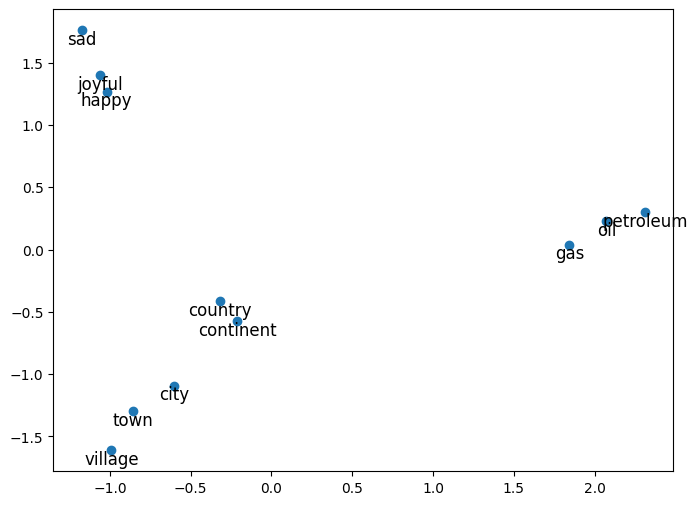

In [ ]:
# visualize some vectors after PCA

plt.figure(figsize=(8, 6))

plt.scatter(X_reduced[:,0], X_reduced[:,1])
for i, name in enumerate(words):
  plt.text(X_reduced[i,0], X_reduced[i,1],name, fontsize=12, ha='center', va='top')
plt.show()

In [ ]:
np.random.seed(0)
X = np.random.randn(50, 10)

pca_result = compute_pca(X, n_components=2)

# Compute SVD
u, s, vt = np.linalg.svd(X)
svd = X @ vt.T[:,:2]

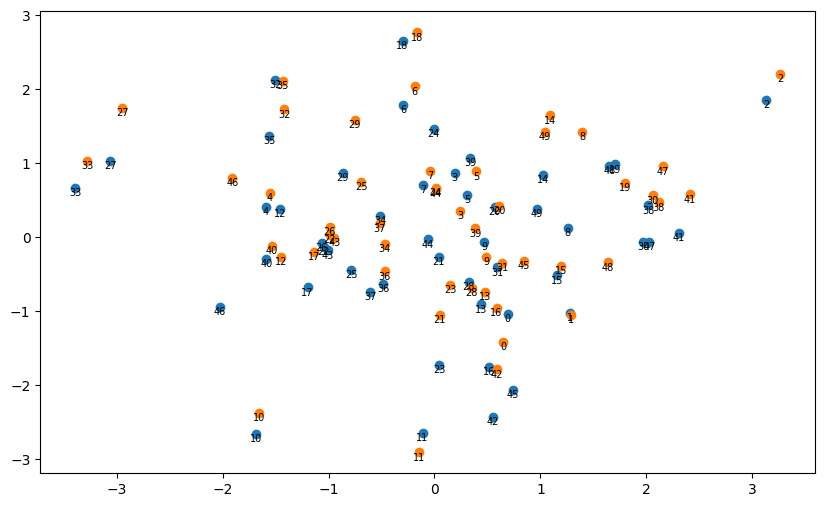

In [ ]:
# comparison between PCA and SVD

plt.figure(figsize=(10,6))

plt.scatter(pca_result[:,0],pca_result[:,1])
plt.scatter(svd[:,0],svd[:,1])

for i in range(len((pca_result))):

  plt.text(pca_result[i,0], pca_result[i,1],i, fontsize=7, ha='center', va='top')
  plt.text(svd[i,0], svd[i,1],i, fontsize=7, ha='center', va='top')